In [21]:

import pandas as pd
df = pd.read_excel('C:/Users/Никита/Desktop/asset-v1_SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


In [23]:
df_customers = pd.read_excel('C:/Users/Никита/Desktop/asset-v1_SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx', sheet_name='customer')
df_customers.head()

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9


In [24]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            4000 non-null   int64 
 1   first_name             4000 non-null   object
 2   last_name              3875 non-null   object
 3   gender                 4000 non-null   object
 4   DOB                    3913 non-null   object
 5   job_title              3494 non-null   object
 6   job_industry_category  3344 non-null   object
 7   wealth_segment         4000 non-null   object
 8   deceased_indicator     4000 non-null   object
 9   owns_car               4000 non-null   object
 10  address                4000 non-null   object
 11  postcode               4000 non-null   int64 
 12  state                  4000 non-null   object
 13  country                4000 non-null   object
 14  property_valuation     4000 non-null   int64 
dtypes: int64(3), object(1

Изначально таблица находится в ненормализованной форме, так как данные в ней не организованы, дублируются, что в свою очередь может привести к аномалиям при манипуляциях с данными, нормализация же нужно для организации данных в базе данных для безопасной и эффективной работы с данными.

Этапы нормализации:

Первая нормальная форма: Разделение повторяющихся групп данных в отдельные таблицы. Выделяем таблицы продуктов,клиентов и транзакций. (1-НФ)

Вторая нормальная форма: каждый столбец в таблице зависит только от первичного ключа (2-НФ)

Третья нормальная форма: устраняем транзитивные зависимости. (3-НФ)

В результате нормализации мы получим отдельные таблицы для транзакций, продуктов и клиентов, что позволит эффективнее хранить данные и избежать избыточности и аномалий при обновлении.

Проверка базы данных на соответствие (1-НФ) показазывает, что некоторые признаки ( gender в таблице customer) содержат неунифицированные значения, что затрудняет корректную обработку данных. Исправив данную проблему в исходном excel файле, перейдем к следующему этапу нормализации.

Проверка базы данных на соответствие (2-НФ). Первичные ключи должны состоять из одного аттрибута, база данных должна находиться в 1-НФ и иметь простой (несоставной) первичный ключ. Проверка на соответствие базы данных условиям  (3-НФ) также показывает, что в таблице transactions столбцы list_price, standard_cost зависят от сочетания столбцов product_id, brand, product_line, product_class, product_size, которые, в свою очередь, зависят от первичного ключа transaction_id, тем самым есть транзитивные зависимости list_price, standard_cost от первичного ключа transaction_id.

Для решения проблемы нужна декомпозиция исходных таблиц transaction и customer, создана таблица product, в которую вынесены соответствующие столбцы, относящиется к продукту, по которому осуществлялась транзакция, создан суррогатный ключ id для уникальности каждого продукта и созданы связи между таблицами customer, transaction и product. Также была произведена дальнейшая декомпозиция трех основных таблиц с созданием отдельных справочников, так как требования нормальных форм говорят нам о зависимости неключевых атрибутов с первичным ключом.

После всех преобразований схема базы данных выглядит следующим образом:

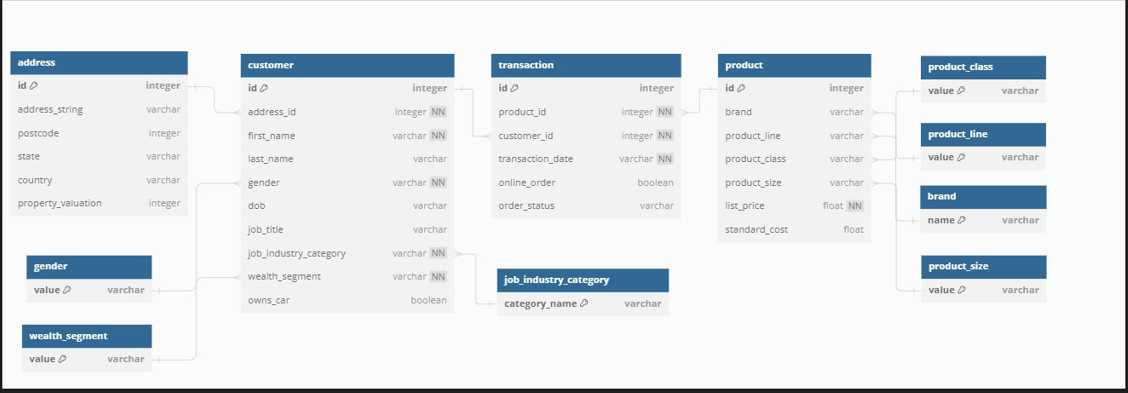
